## Loading Motion Sensor Data into Pandas DataFrame


In [1]:
!pip install imutils


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/mobile_computing_project/B_Accelerometer_data.zip -d accelerometer-dataset


Archive:  /content/drive/MyDrive/mobile_computing_project/B_Accelerometer_data.zip
   creating: accelerometer-dataset/B_Accelerometer_data/
   creating: accelerometer-dataset/B_Accelerometer_data/dws_11/
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_12.csv  
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_1.csv  
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_13.csv  
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_11.csv  
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_2.csv  
   creating: accelerometer-dataset/__MACOSX/
   creating: accelerometer-dataset/__MACOSX/B_Accelerometer_data/
   creating: accelerometer-dataset/__MACOSX/B_Accelerometer_data/dws_11/
  inflating: accelerometer-dataset/__MACOSX/B_Accelerometer_data/dws_11/._sub_2.csv  
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_3.csv  
  inflating: accelerometer-dataset/B_Accelerometer_data/dws_11/sub_10.csv

In [4]:
!unzip /content/drive/MyDrive/mobile_computing_project/C_Gyroscope_data.zip -d gyroscope-dataset

Archive:  /content/drive/MyDrive/mobile_computing_project/C_Gyroscope_data.zip
   creating: gyroscope-dataset/C_Gyroscope_data/
   creating: gyroscope-dataset/C_Gyroscope_data/dws_11/
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_12.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_1.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_13.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_11.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_2.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_3.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_10.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_14.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_7.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_6.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_15.csv  
  inflating: gyroscope-dataset/C_Gyroscope_data/dws_11/sub_17.csv  
  inf

In [5]:
import os
import numpy as np
import pandas as pd

# change these following three lines only
subject_data_file = '/content/drive/MyDrive/mobile_computing_project/data_subjects_info.csv'
data_dir = '/content/accelerometer-dataset'

os.chdir(data_dir)
os.chdir(os.pardir)

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:

    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]

        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])

    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)

In [6]:

# change these following three lines only
subject_data_file = '/content/drive/MyDrive/mobile_computing_project/data_subjects_info.csv'
data_dir = '/content/gyroscope-dataset'



subject_data_frame2 = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths2 = get_all_dataset_paths(data_dir)
data_frame2 = load_whole_dataframe_from_paths(all_dataset_paths2, subject_data_frame2)

In [7]:
data_frame2

,Unnamed: 0,subject_id,session_id,category,age,gender,height,weight,x,y,z
0,0,3,3,ups,28,0,161,48,0.809305,0.024471,0.370954
1,1,3,3,ups,28,0,161,48,0.642515,0.234594,0.183649
2,2,3,3,ups,28,0,161,48,0.528478,0.480080,0.164378
3,3,3,3,ups,28,0,161,48,0.304588,0.383494,0.269760
4,4,3,3,ups,28,0,161,48,-0.131929,0.061370,0.217985
...,...,...,...,...,...,...,...,...,...,...,...
1413257,1881,7,1,dws,30,0,175,62,1.837442,0.805845,1.477402
1413258,1882,7,1,dws,30,0,175,62,1.795788,-0.029686,1.602096
1413259,1883,7,1,dws,30,0,175,62,0.936136,-0.054272,1.037443
1413260,1884,7,1,dws,30,0,175,62,0.797001,-1.113796,0.785728


In [8]:
data_frame2.rename(columns={'x': 'gyroscope_x',
                   'y': 'gyroscope_y',
                   'z': 'gyroscope_z'}, inplace=True)
data_frame2

,Unnamed: 0,subject_id,session_id,category,age,gender,height,weight,gyroscope_x,gyroscope_y,gyroscope_z
0,0,3,3,ups,28,0,161,48,0.809305,0.024471,0.370954
1,1,3,3,ups,28,0,161,48,0.642515,0.234594,0.183649
2,2,3,3,ups,28,0,161,48,0.528478,0.480080,0.164378
3,3,3,3,ups,28,0,161,48,0.304588,0.383494,0.269760
4,4,3,3,ups,28,0,161,48,-0.131929,0.061370,0.217985
...,...,...,...,...,...,...,...,...,...,...,...
1413257,1881,7,1,dws,30,0,175,62,1.837442,0.805845,1.477402
1413258,1882,7,1,dws,30,0,175,62,1.795788,-0.029686,1.602096
1413259,1883,7,1,dws,30,0,175,62,0.936136,-0.054272,1.037443
1413260,1884,7,1,dws,30,0,175,62,0.797001,-1.113796,0.785728


In [9]:
data_frame

,Unnamed: 0,x,y,z,subject_id,session_id,category,age,gender,height,weight
0,0,-0.041565,0.980118,-0.084549,3,3,ups,28,0,161,48
1,1,-0.062515,0.702606,-0.203598,3,3,ups,28,0,161,48
2,2,-0.036407,0.469910,-0.121429,3,3,ups,28,0,161,48
3,3,0.050491,0.517929,-0.141876,3,3,ups,28,0,161,48
4,4,0.124039,0.512344,-0.141144,3,3,ups,28,0,161,48
...,...,...,...,...,...,...,...,...,...,...,...
1433820,1915,0.061035,1.510345,-0.322556,7,1,dws,30,0,175,62
1433821,1916,0.477737,1.159683,-0.276703,7,1,dws,30,0,175,62
1433822,1917,0.110107,1.093796,-0.481110,7,1,dws,30,0,175,62
1433823,1918,0.345978,1.343979,-0.573730,7,1,dws,30,0,175,62


In [10]:
data_frame.rename(columns={'x': 'accelerometer_x',
                   'y': 'accelerometer_y',
                   'z': 'accelerometer_z'}, inplace=True)
data_frame

,Unnamed: 0,accelerometer_x,accelerometer_y,accelerometer_z,subject_id,session_id,category,age,gender,height,weight
0,0,-0.041565,0.980118,-0.084549,3,3,ups,28,0,161,48
1,1,-0.062515,0.702606,-0.203598,3,3,ups,28,0,161,48
2,2,-0.036407,0.469910,-0.121429,3,3,ups,28,0,161,48
3,3,0.050491,0.517929,-0.141876,3,3,ups,28,0,161,48
4,4,0.124039,0.512344,-0.141144,3,3,ups,28,0,161,48
...,...,...,...,...,...,...,...,...,...,...,...
1433820,1915,0.061035,1.510345,-0.322556,7,1,dws,30,0,175,62
1433821,1916,0.477737,1.159683,-0.276703,7,1,dws,30,0,175,62
1433822,1917,0.110107,1.093796,-0.481110,7,1,dws,30,0,175,62
1433823,1918,0.345978,1.343979,-0.573730,7,1,dws,30,0,175,62


In [11]:
data_frame['gyroscope_x'] = data_frame2['gyroscope_x']
data_frame['gyroscope_y'] = data_frame2['gyroscope_y']
data_frame['gyroscope_z'] = data_frame2['gyroscope_z']

data_frame

,Unnamed: 0,accelerometer_x,accelerometer_y,accelerometer_z,subject_id,session_id,category,age,gender,height,weight,gyroscope_x,gyroscope_y,gyroscope_z
0,0,-0.041565,0.980118,-0.084549,3,3,ups,28,0,161,48,0.809305,0.024471,0.370954
1,1,-0.062515,0.702606,-0.203598,3,3,ups,28,0,161,48,0.642515,0.234594,0.183649
2,2,-0.036407,0.469910,-0.121429,3,3,ups,28,0,161,48,0.528478,0.480080,0.164378
3,3,0.050491,0.517929,-0.141876,3,3,ups,28,0,161,48,0.304588,0.383494,0.269760
4,4,0.124039,0.512344,-0.141144,3,3,ups,28,0,161,48,-0.131929,0.061370,0.217985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433820,1915,0.061035,1.510345,-0.322556,7,1,dws,30,0,175,62,NaN,NaN,NaN
1433821,1916,0.477737,1.159683,-0.276703,7,1,dws,30,0,175,62,NaN,NaN,NaN
1433822,1917,0.110107,1.093796,-0.481110,7,1,dws,30,0,175,62,NaN,NaN,NaN
1433823,1918,0.345978,1.343979,-0.573730,7,1,dws,30,0,175,62,NaN,NaN,NaN


In [12]:
data_frame.to_csv('/content/acc_&_gyro_df.csv', index=False)

## Data Preprocessing: Removing Unnecessary Columns
In this Python code, a copy of the original DataFrame 'data_frame' is created. Subsequently, several columns ('Unnamed: 0', 'subject_id', 'session_id', 'age', 'gender', 'height', and 'weight') are removed from the copied DataFrame 'df' to streamline the dataset for further analysis.

In [13]:
df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,accelerometer_x,accelerometer_y,accelerometer_z,category,gyroscope_x,gyroscope_y,gyroscope_z
0,-0.041565,0.980118,-0.084549,ups,0.809305,0.024471,0.370954
1,-0.062515,0.702606,-0.203598,ups,0.642515,0.234594,0.183649
2,-0.036407,0.469910,-0.121429,ups,0.528478,0.480080,0.164378
3,0.050491,0.517929,-0.141876,ups,0.304588,0.383494,0.269760
4,0.124039,0.512344,-0.141144,ups,-0.131929,0.061370,0.217985
...,...,...,...,...,...,...,...
1433820,0.061035,1.510345,-0.322556,dws,NaN,NaN,NaN
1433821,0.477737,1.159683,-0.276703,dws,NaN,NaN,NaN
1433822,0.110107,1.093796,-0.481110,dws,NaN,NaN,NaN
1433823,0.345978,1.343979,-0.573730,dws,NaN,NaN,NaN


In [14]:
data_frame.dropna(subset=['gyroscope_x', 'gyroscope_y', 'gyroscope_z'], inplace=True)


In [15]:
data_frame

,Unnamed: 0,accelerometer_x,accelerometer_y,accelerometer_z,subject_id,session_id,category,age,gender,height,weight,gyroscope_x,gyroscope_y,gyroscope_z
0,0,-0.041565,0.980118,-0.084549,3,3,ups,28,0,161,48,0.809305,0.024471,0.370954
1,1,-0.062515,0.702606,-0.203598,3,3,ups,28,0,161,48,0.642515,0.234594,0.183649
2,2,-0.036407,0.469910,-0.121429,3,3,ups,28,0,161,48,0.528478,0.480080,0.164378
3,3,0.050491,0.517929,-0.141876,3,3,ups,28,0,161,48,0.304588,0.383494,0.269760
4,4,0.124039,0.512344,-0.141144,3,3,ups,28,0,161,48,-0.131929,0.061370,0.217985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413257,1152,-0.650330,3.910721,-0.934250,12,1,dws,33,1,167,60,1.837442,0.805845,1.477402
1413258,1153,-0.472107,1.505203,-1.029465,12,1,dws,33,1,167,60,1.795788,-0.029686,1.602096
1413259,1154,-0.341064,0.995377,-1.061462,12,1,dws,33,1,167,60,0.936136,-0.054272,1.037443
1413260,1155,-0.599304,0.740372,-0.582275,12,1,dws,33,1,167,60,0.797001,-1.113796,0.785728


In [16]:
data_frame.isna().sum()

Unnamed: 0         0
accelerometer_x    0
accelerometer_y    0
accelerometer_z    0
subject_id         0
session_id         0
category           0
age                0
gender             0
height             0
weight             0
gyroscope_x        0
gyroscope_y        0
gyroscope_z        0
dtype: int64

In [17]:
data_frame.describe().round(2)

,accelerometer_x,accelerometer_y,accelerometer_z,subject_id,session_id,age,gender,height,weight,gyroscope_x,gyroscope_y,gyroscope_z
count,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00,1413262.00
mean,0.04,0.80,-0.10,12.41,7.67,28.85,0.57,173.98,72.15,0.00,0.05,0.02
std,0.45,0.63,0.52,6.93,3.85,5.32,0.49,8.80,15.97,1.29,1.23,0.81
min,-7.16,-4.83,-7.46,1.00,1.00,18.00,0.00,161.00,48.00,-17.37,-18.38,-12.15
25%,-0.23,0.39,-0.38,6.00,5.00,25.00,0.00,164.00,60.00,-0.29,-0.13,-0.09
50%,0.02,0.88,-0.04,12.00,7.00,28.00,1.00,175.00,72.00,-0.00,0.04,0.00
75%,0.31,1.00,0.13,19.00,9.00,31.00,1.00,180.00,78.00,0.11,0.27,0.12
max,8.00,7.98,6.93,24.00,16.00,46.00,1.00,190.00,102.00,11.11,17.58,11.44


## Encoding Categorical Data for Machine Learning


In [18]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,code
0,-0.041565,0.980118,-0.084549,0.809305,0.024471,0.370954,4
1,-0.062515,0.702606,-0.203598,0.642515,0.234594,0.183649,4
2,-0.036407,0.469910,-0.121429,0.528478,0.480080,0.164378,4
3,0.050491,0.517929,-0.141876,0.304588,0.383494,0.269760,4
4,0.124039,0.512344,-0.141144,-0.131929,0.061370,0.217985,4
...,...,...,...,...,...,...,...
1433820,0.061035,1.510345,-0.322556,NaN,NaN,NaN,0
1433821,0.477737,1.159683,-0.276703,NaN,NaN,NaN,0
1433822,0.110107,1.093796,-0.481110,NaN,NaN,NaN,0
1433823,0.345978,1.343979,-0.573730,NaN,NaN,NaN,0


## Visualizing Categorical Data Distribution


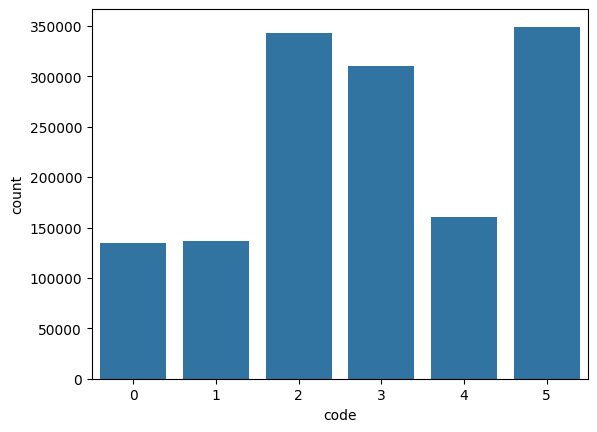

In [19]:
import seaborn as sns
import matplotlib.pylab as plt

sns.countplot(df, x='code')
plt.show()

In [20]:
df.describe().round(2)

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,code
count,1433825.00,1433825.00,1433825.00,1413262.00,1413262.00,1413262.00,1433825.00
mean,0.04,0.80,-0.10,0.00,0.05,0.02,2.89
std,0.45,0.63,0.52,1.29,1.23,0.81,1.59
min,-7.16,-4.83,-7.46,-17.37,-18.38,-12.15,0.00
25%,-0.22,0.40,-0.37,-0.29,-0.13,-0.09,2.00
50%,0.02,0.88,-0.04,-0.00,0.04,0.00,3.00
75%,0.31,1.01,0.13,0.11,0.27,0.12,4.00
max,8.00,7.98,6.93,11.11,17.58,11.44,5.00


## Splitting Data for Machine Learning


In [21]:
from sklearn.model_selection import train_test_split

x_columns = df.iloc[:, 0:6]
y_columns = df.iloc[:, 6:7]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [22]:
trainx

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z
0,-0.041565,0.980118,-0.084549,0.809305,0.024471,0.370954
1,-0.062515,0.702606,-0.203598,0.642515,0.234594,0.183649
2,-0.036407,0.469910,-0.121429,0.528478,0.480080,0.164378
3,0.050491,0.517929,-0.141876,0.304588,0.383494,0.269760
4,0.124039,0.512344,-0.141144,-0.131929,0.061370,0.217985
...,...,...,...,...,...,...
1147055,0.145065,0.455704,-0.114700,0.012170,-0.103525,0.037605
1147056,0.074371,0.712982,-0.287445,0.022838,-0.100379,0.040881
1147057,0.012756,0.871689,-0.370819,0.019729,-0.082250,0.038699
1147058,-0.004410,0.860199,-0.266739,0.009190,-0.056633,0.035388


In [23]:
trainy

,code
0,4
1,4
2,4
3,4
4,4
...,...
1147055,0
1147056,0
1147057,0
1147058,0


## Sequencing Data for Temporal Analysis
We define a sequence generator function that creates sequences of input features and corresponding target labels from the training and testing data. These sequences have a window length of 150 with a stride of 10. The mode of target labels within each sequence is calculated to represent the label for that sequence. This prepares the data for temporal analysis tasks.

In [24]:
from scipy.stats import mode

WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 6
BATCH_SIZE = 100
EPOCHS_SIZE = 10

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)
    # print(len(x))
    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

## One-Hot Encoding Target Labels


In [25]:
from keras.utils import to_categorical

tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

## Defining LSTM-based Deep Learning Model


In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import to_categorical


model = Sequential()
model.add(Input((WINDOW_LENGTH, NUM_FEATURES)))
model.add(LSTM(6, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 6)            312       
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 128)               115328    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 116414 (454.74 KB)
Trainable params: 116414 (454.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the LSTM Model


In [27]:
history = model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)

Epoch 1/10
1147/1147 [==============================] - 73s 62ms/step - loss: 0.3053 - accuracy: 0.8969
Epoch 2/10
1147/1147 [==============================] - 71s 62ms/step - loss: 0.1189 - accuracy: 0.9596
Epoch 3/10
1147/1147 [==============================] - 66s 58ms/step - loss: 0.0790 - accuracy: 0.9730
Epoch 4/10
1147/1147 [==============================] - 66s 58ms/step - loss: 0.0593 - accuracy: 0.9790
Epoch 5/10
1147/1147 [==============================] - 71s 62ms/step - loss: 0.0465 - accuracy: 0.9837
Epoch 6/10
1147/1147 [==============================] - 66s 58ms/step - loss: 0.0374 - accuracy: 0.9866
Epoch 7/10
1147/1147 [==============================] - 66s 58ms/step - loss: 0.0291 - accuracy: 0.9898
Epoch 8/10
1147/1147 [==============================] - 69s 60ms/step - loss: 0.0232 - accuracy: 0.9920
Epoch 9/10
1147/1147 [==============================] - 66s 57ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 10/10
1147/1147 [==============================] - 66s 58m

{'loss': [0.30531179904937744, 0.11893972009420395, 0.07897982746362686, 0.059263963252305984, 0.04651439189910889, 0.03744111955165863, 0.02913210168480873, 0.023174846544861794, 0.019681787118315697, 0.017183443531394005], 'accuracy': [0.8968541622161865, 0.9595786929130554, 0.9730321168899536, 0.9790482521057129, 0.9836605787277222, 0.9865727424621582, 0.9898161888122559, 0.9920046925544739, 0.9931643009185791, 0.9941495656967163]}


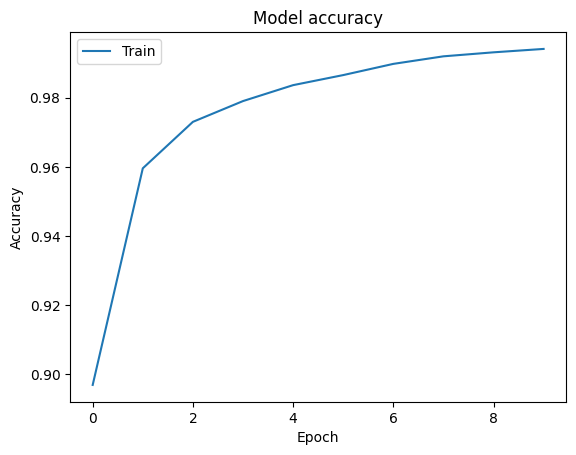

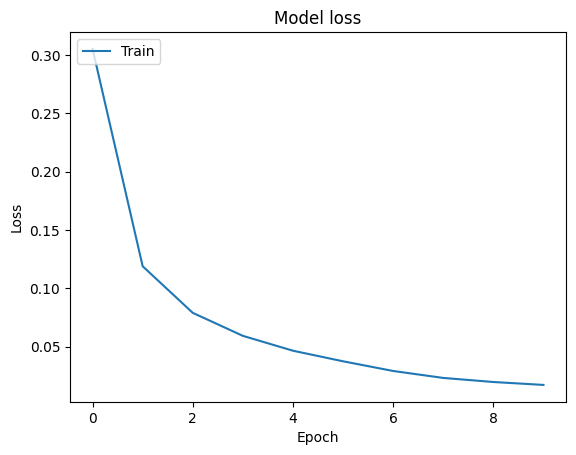

In [28]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    print(history.history)
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to plot training history
plot_training_history(history)


## Evaluating the LSTM Model


In [29]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

287/287 [==============================] - 7s 24ms/step - loss: nan - accuracy: 0.9343


[nan, 0.9343032836914062]

## Stratified Cross-Validation for Model Evaluation
We perform stratified cross-validation using the StratifiedKFold method from scikit-learn. It divides the data into 5 folds, trains the LSTM model on different train-test splits, and evaluates the model's performance on each fold. The accuracy of the model on each test set is recorded in the 'lst_accu_stratified' list for further analysis.

In [31]:
from sklearn.model_selection import StratifiedKFold

NUM_SPLITS = 5

skf = StratifiedKFold(n_splits = NUM_SPLITS, shuffle=False)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_columns, y_columns):
    x_train_fold, x_test_fold = x_columns.iloc[train_index], x_columns.iloc[test_index]
    y_train_fold, y_test_fold = y_columns.iloc[train_index], y_columns.iloc[test_index]

    tx, ty = sequence_generator(x_train_fold, y_train_fold, WINDOW_LENGTH, STRIDE_LENGTH)
    vx, vy = sequence_generator(x_test_fold, y_test_fold, WINDOW_LENGTH, STRIDE_LENGTH)

    tty = to_categorical(ty, num_classes = NUM_CLASSES)
    vvy = to_categorical(vy, num_classes = NUM_CLASSES)

    model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)

    test_loss, test_accuracy = model.evaluate(vx, vvy)
    lst_accu_stratified.append(test_accuracy)

## Analyzing Model Cross-Validation Results


In [34]:
from statistics import stdev, mean

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified))
print('\nMinimum Accuracy:', min(lst_accu_stratified))
# print('\nOverall Accuracy:', mean(lst_accu_stratified))
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

#Saving model

There are 6 different labels:

dws: downstairs

ups: upstairs

sit: sitting

std: standing

wlk: walking

jog: jogging

In [33]:
model.save("/content/latest_motion_detection_model.h")

In [ ]:
# # how to load model

# from tensorflow.keras.models import load_model

# model2 = load_model("/content/latest_motion_detection_model.h5")

#Try to predict


In [ ]:
tx.shape

In [ ]:
encoded_labels_mapping = dict(zip(range(len(lEncoder.classes_)), lEncoder.classes_))


In [ ]:
encoded_labels_mapping

In [ ]:
np.argmax(model.predict(np.array([tx[11100]])))

In [ ]:
ty[11100]